X.shape:  (244, 2)


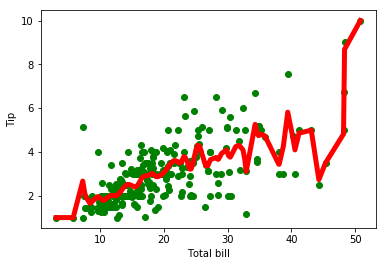

In [3]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
from scipy.stats.stats import pearsonr
def kernel(point,xmat,k):
    m,n=np1.shape(xmat)
    weights=np1.mat(np1.eye((m)))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=np1.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n=np1.shape(xmat)
    ypred=np1.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
data=pd.read_csv('tips.csv')
bill=np1.array(data.total_bill)
tip=np1.array(data.tip)
mbill=np1.mat(bill)
mtip=np1.mat(tip)
m=np1.shape(mbill)[1]
one=np1.mat(np1.ones(m))
X=np1.hstack((one.T,mbill.T))
print("X.shape: ",X.shape)
ypred=localWeightRegression(X,mtip,0.5)
SortIndex=X[:,1].argsort(0)
xsort=X[SortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color='red',linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();